In [ ]:
import pandas as pd
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small') 
import matplotlib.pyplot as plt

from statsmodels.tsa.x13 import x13_arima_analysis

In [2]:
file = '../datos/afiliadosmedios.csv'

orig_m = pd.read_csv(file, sep=";")
orig_m = orig_m.rename(columns={'date': 'Fecha'})
orig_m.index = pd.PeriodIndex(orig_m.Fecha.tolist(), freq='M')
orig_m.drop('Fecha', axis=1, inplace=True)
orig_m=orig_m.loc['20010101':]

In [9]:

thw = pd.read_csv(r'C:\Users\alejh\Google Drive\Nowcast\desestacionalizado\tradingday_hollidays_weekends.csv', sep=";", encoding="utf-8")
thw.index = pd.PeriodIndex(thw.Fecha.tolist(), freq='M')
thw.drop('Fecha', axis=1, inplace=True)


XPATH=os.chdir("C:/WinX13/x13as")
resultst = x13_arima_analysis(endog = orig_m['afiliados medios'], exog= thw, x12path=XPATH, trading=True, outlier=False)
deses=resultst.seasadj 

inc=deses.diff()

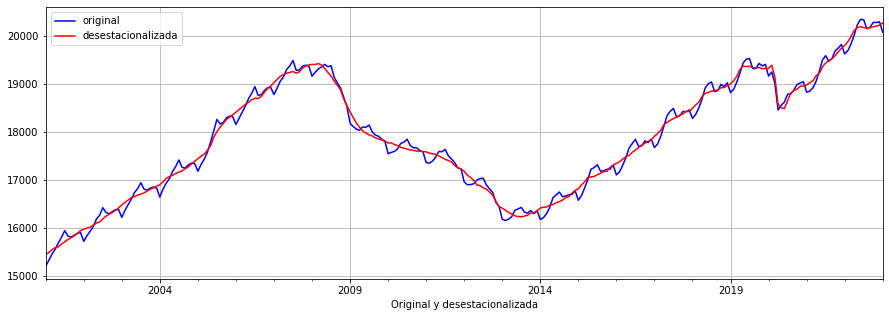

In [10]:
plt.figure(figsize=(15,5))
plt.xlabel('Original y desestacionalizada')

ax1 = orig_m['afiliados medios'].plot(color='blue', grid=True, label='original')
ax2 = deses.plot(color='red', grid=True,  label='desestacionalizada')

h1, l1 = ax1.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.show()

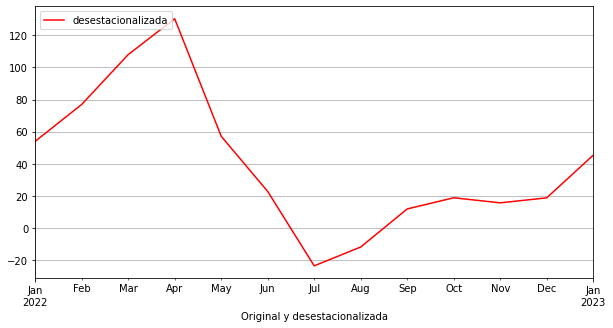

In [12]:
inc=inc.loc['20220101':]
plt.figure(figsize=(10,5))
plt.xlabel('Original y desestacionalizada')

ax1 = inc.plot(color='red', grid=True,  label='desestacionalizada')

h1, l1 = ax1.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.show()